In [3]:
0.02 * 10000

200.0

In [2]:
from misc import *
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau, MultiStepLR

%load_ext autoreload
%autoreload 2
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# Parameters for loading the .mat file
data_dir = "C:/Users/Mircea/Google Drive/Data/nn-dipole-fitting/"
path_test = [each.replace("\\","/") for each in glob(data_dir + "Dataset SNR*.mat")]
path_train = data_dir + "Clean Dataset Short.mat"

# Create iamge folder if necessary
if not os.path.isdir(data_dir + "Topo 64/"):
    os.mkdir(data_dir + "Topo 64/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CUDA is available!  Training on GPU ...
Using GeForce RTX 2070


In [2]:
# Read the training and validation data 
data_train, data_valid = read_train_data(path_train)
# Read the test data on all SNRs
data_test = [read_test_data(each) for each in path_test]

In [7]:
from misc import dipfit
model = dipfit(data_train["n_chan"])
model = model.to(device)

optimizer = optim.Adam(model.parameters(),3e-4) 

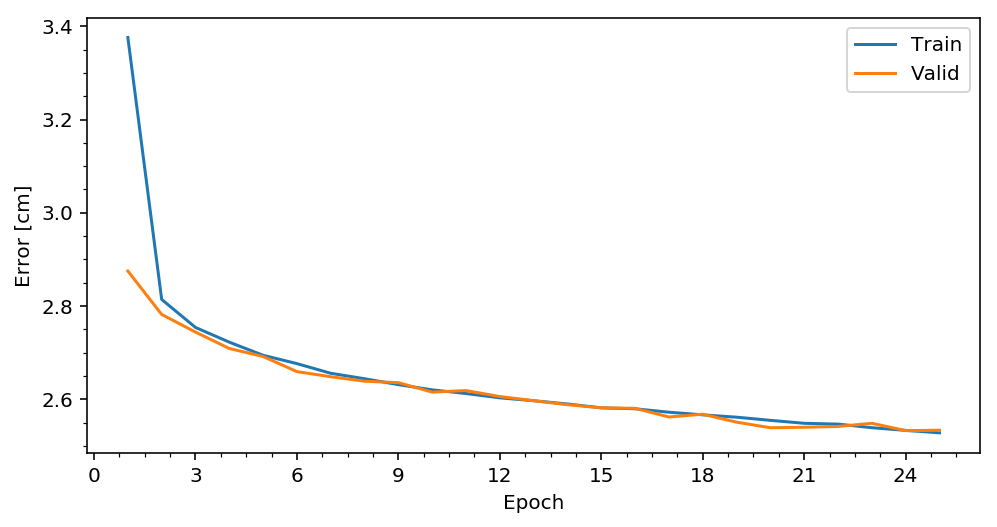

25 epochs ready in 197.586 seconds. Minimum validation loss: 2.532807
Train batch time: 0.00671 ± 0.00035 seconds
Valid batch time: 0.00188 ± 0.00006 seconds


In [8]:
model, train_loss, valid_loss = train(model,data_train,data_valid,n_epochs,batch_size,device,optimizer,"model.pt",show_every=1)

In [10]:
for i in range(len(data_test)):

    # Test dipoles location - ground truth
    test_dipoles = torch.from_numpy(data_test[i]["dipoles"]).to(device)
    # Calculate test loss for the network
    pred_dipoles_nn = model(torch.from_numpy(data_test[i]["fields"]).to(device))
    loc_error_nn = torch.mean(get_localization_error(pred_dipoles_nn,test_dipoles)).item()
    # Test loss for Levenberg-Marquadt
    pred_dipoles_lm = torch.from_numpy(data_test[i]["dipoles_estimated"]).to(device)
    loc_error_lm = torch.mean(get_localization_error(pred_dipoles_lm,test_dipoles)).item()
    print(f"Localization error: \nNN: {loc_error_nn:.3f} cm\nLM: {loc_error_lm:.3f} cm")

Localization error: 
NN: 6.407 cm
LM: 10.099 cm
Localization error: 
NN: 3.855 cm
LM: 5.229 cm
Localization error: 
NN: 1.817 cm
LM: 2.079 cm
Localization error: 
NN: 1.064 cm
LM: 1.071 cm


In [11]:
def get_test_pred(data_test,device):
    # Test dipoles location - ground truth
    test_dipoles = torch.from_numpy(data_test[i]["dipoles"]).to(device)    

In [25]:
with h5py.File(data_dir + 'Channel Locations.mat', 'r') as file:
    locs = np.array(file['locs']).T
    
locs.shape

(64, 5)

In [4]:
from mne.viz import plot_topomap
t = time.time()
im, cn = plot_topomap(data_train["fields"][3,:], locs[:,1:3], sensors=True, contours=0, show=False, outlines='skirt')
plt.savefig('foo.jpg', bbox_inches='tight', dpi=50)

NameError: name 'data_train' is not defined

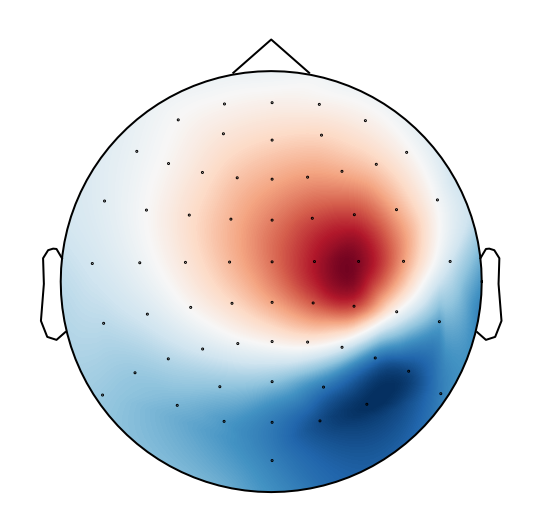

In [67]:
from mne.viz import plot_topomap
t = time.time()
im, cn = plot_topomap(data_train["fields"][3,:], locs[:,1:3], sensors=True, contours=0, show=False)
plt.savefig('foo.jpg', bbox_inches='tight', dpi=50)

In [70]:
import mne
from mne.forward import make_forward_dipole
from mne.evoked import combine_evoked
from mne.simulation import simulate_evoked

from nilearn.plotting import plot_anat
from nilearn.datasets import load_mni152_template

[ 30.    -60.     25.     59.158  21.599  63.739]


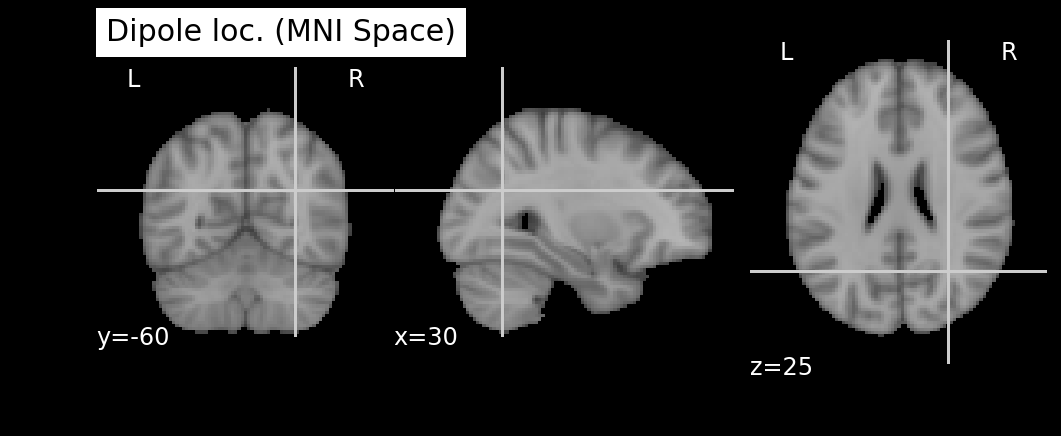

In [76]:
dip = np.array([3.0,-6.0,2.5,5.9158,2.1599,6.3739])*10
print(dip)

template = load_mni152_template()
fig = plot_anat(template, cut_coords=dip[:3],
                title='Dipole loc. (MNI Space)')